In [1]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#parameters

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)  #setting random state to numpy
tf.random.set_seed(RANDOM_STATE)  #setting random state to tensorflow

EPOCHS = 100

TEST_SIZE = 0.2


In [3]:
#reading dataset
data_df = pd.read_csv("wine.csv", header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
'''
#another way to read data if csv file in input folder
inpDir = '../input'
data_df1 = pd.read_csv(os.path.join(inpDir, 'wine.csv') header=None)
data_df1.head()
'''

"\n#another way to read data if csv file in input folder\ninpDir = '../input'\ndata_df1 = pd.read_csv(os.path.join(inpDir, 'wine.csv') header=None)\ndata_df1.head()\n"

In [5]:
data_df.shape

(178, 14)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
#to print unique values in each column
for col in data_df.columns:
    print(f'Col: {col} | {data_df[col].unique()}')

Col: 0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Col: 1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.

In [9]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

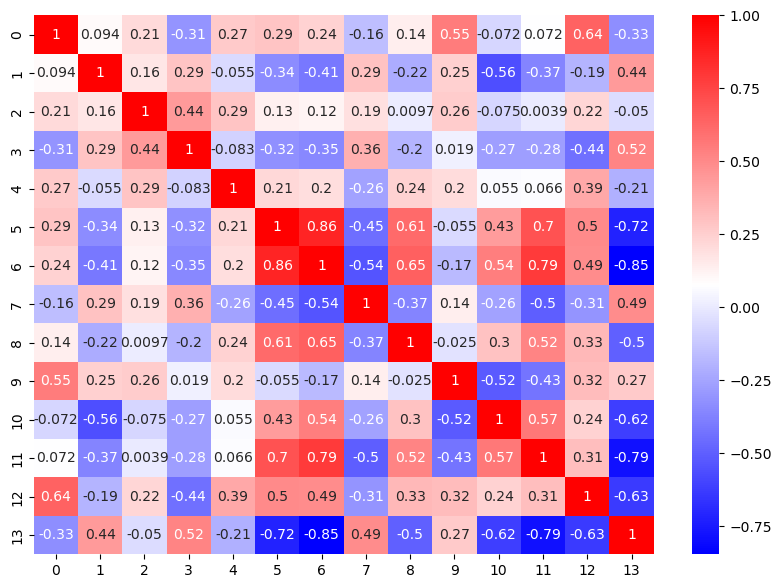

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data_df.corr(), annot=True, cmap='bwr')

In [11]:
#splitting data for y
labels = data_df[data_df.columns[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 13, Length: 178, dtype: int64

In [12]:
#splitting data for X 
features_df = data_df.drop(data_df.columns[-1], axis = 1)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, 
                                                    stratify=labels, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [14]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [15]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)  #standardscaler transforms dataframe to numpyarray so need to use to_numpy
X_test = sc.transform(X_test)

#label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

type(X_train), type(X_test), type(y_train), type(y_test)

#if label encoding is done dataframe gets transformed to numpyarray otherwise do this
#y_train = y_train.to_numpy()         #converting from dataframe to numpyarray using to_numpy
#y_test = y_test.to_numpy()

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [16]:
#tf.keras.Sequential?

In [17]:
#model creation 

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8,                            
                                activation='relu',
                                kernel_regularizer=None))

model.add(tf.keras.layers.Dense(3))


#or 
"""
model = tf.keras.Sequential([
                tf.keras.layers.Dense(8,activation='relu),
                tf.keras.layers.Dense(3)])
"""

"\nmodel = tf.keras.Sequential([\n                tf.keras.layers.Dense(8,activation='relu),\n                tf.keras.layers.Dense(3)])\n"

In [18]:
#tf.keras.layers.Dense?

In [19]:
#to calculate loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#model compilation
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])

In [20]:
#to collect 

#batchsize is by default 32 in tf no need to specify
hist = model.fit(X_train, y_train, epochs=EPOCHS, 
                 validation_data=[X_test, y_test])

Epoch 1/100


5/5 [==============================] - 1s 92ms/step - loss: 1.7907 - accuracy: 0.1620 - val_loss: 1.6700 - val_accuracy: 0.0833
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 1.7247 - accuracy: 0.1761 - val_loss: 1.5981 - val_accuracy: 0.0833
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 1.6660 - accuracy: 0.1831 - val_loss: 1.5293 - val_accuracy: 0.0833
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 1.6078 - accuracy: 0.1901 - val_loss: 1.4640 - val_accuracy: 0.1111
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 1.5507 - accuracy: 0.1901 - val_loss: 1.4033 - val_accuracy: 0.1667
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 1.4983 - accuracy: 0.1972 - val_loss: 1.3460 - val_accuracy: 0.1667
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 1.4498 - accuracy: 0.2113 - val_loss: 1.2899 - val_accuracy: 0.1667
Epoch 8/100
5/5 [=

In [21]:
#converting history into dataframe for curve
loss_fn = pd.DataFrame(hist.history)
loss_fn.head()

,loss,accuracy,val_loss,val_accuracy
0,1.790685,0.161972,1.669962,0.083333
1,1.724725,0.176056,1.598083,0.083333
2,1.665972,0.183099,1.529266,0.083333
3,1.607780,0.190141,1.463986,0.111111
4,1.550706,0.190141,1.403268,0.166667


<Axes: >

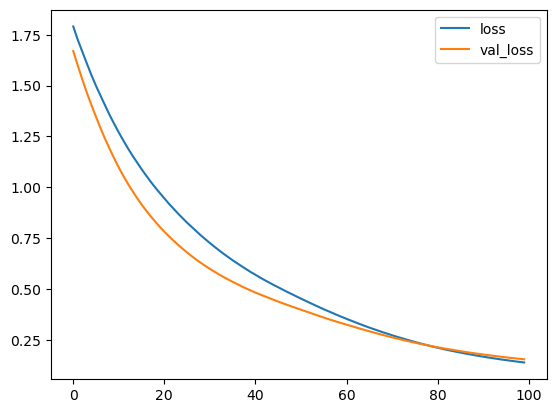

In [22]:
loss_fn.plot(y = ['loss','val_loss'])

<Axes: >

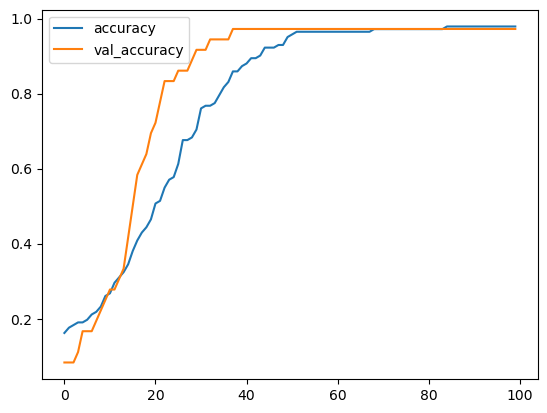

In [23]:
loss_fn.plot(y = ['accuracy','val_accuracy'])

In [24]:
y_pred = model.predict(X_test)
y_pred.shape

2/2 [==============================] - 0s 2ms/step


(36, 3)

In [25]:
y_pred.argmax(axis=1) #gives index of largest in each row

array([1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [27]:
confusion_matrix(y_test, y_pred.argmax(axis=1))

array([[12,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]], dtype=int64)